In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.pandas.set_option('display.max_columns', None)

In [5]:
df_x=pd.read_csv(r'C:\Users\user\xtrain.csv')

In [6]:
df_x.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,YearRemodAdd,RoofStyle,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.75,0.636364,0.666667,0.098361,0.0,0.75,0.25,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.50,1.0,0.75
1,0.000000,0.75,0.500000,0.555556,0.524590,0.0,0.75,1.00,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
2,0.235294,0.75,0.636364,0.666667,0.114754,0.0,0.75,0.50,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.50,1.0,0.75
3,0.294118,0.75,0.727273,0.666667,0.606557,0.0,0.50,0.25,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.8,0.4,0.333333,0.75,1.0,0.00
4,0.235294,0.75,1.000000,0.777778,0.147541,0.0,0.75,0.75,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.6,0.8,0.666667,0.75,1.0,0.75


In [7]:
df_y=pd.read_csv(r'C:\Users\user\ytrain.csv')

In [8]:
df_y.sample(5)

,SalePrice
526,11.790557
650,12.235389
828,12.128111
1316,12.596400
1272,11.827736


**Train Test Split**

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=0)

Trying different models to know which gives the best prediction

In [10]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

In [11]:
ridge=Ridge().fit(X_train,Y_train)
ridge.score(X_test,Y_test)

0.8461752620178966

In [12]:
linear=LinearRegression().fit(X_train,Y_train)
linear.score(X_test,Y_test)

0.8429983139677526

In [13]:
decision=DecisionTreeRegressor().fit(X_train,Y_train)
decision.score(X_test,Y_test)

0.7056580021904335

In [14]:
svr=SVR().fit(X_train,Y_train)
svr.score(X_test,Y_test)

0.8719619514323411

In [15]:
regressor=RandomForestRegressor().fit(X_train,Y_train)
regressor.score(X_test,Y_test)

0.8779365828012718

In [16]:
grad=GradientBoostingRegressor()
grad.fit(X_train,Y_train)
grad.score(X_test,Y_test)

0.8808812487967623

In [17]:
bagregressor=BaggingRegressor().fit(X_train,Y_train)
bagregressor.score(X_test,Y_test)

0.8646524094642382

In [ ]:
extra=ExtraTreesRegressor().fit(X_train,Y_train)
extra.score(X_test,Y_test)


In [19]:
ada=AdaBoostRegressor().fit(X_train,Y_train)
ada.score(X_test,Y_test)

0.813907195200398

## Cross validation

In [20]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(grad,df_x,df_y,cv=10)

In [21]:
score.mean()

0.8938666775579158

## Hyper Parameter Optimization

In [22]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#learning_rate=[int(x) for x in np.linspace(0.05, 0.2,10)]
learning_rate=[0.1,0.2]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

criterion = ['friedman_mse', 'mse', 'mae']
loss=      ['ls', 'lad', 'huber', 'quantile']

max_depth = [int(x) for x in np.linspace(1, 100,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

subsample=[int(x) for x in np.linspace(0.8,2,7)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'subsample': subsample,
              'criterion':  ['friedman_mse', 'mse', 'mae'],
              'loss':     ['ls', 'lad', 'huber', 'quantile']
              }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': [0.1, 0.2], 'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'subsample': [0, 1, 1, 1, 1, 1, 2], 'criterion': ['friedman_mse', 'mse', 'mae'], 'loss': ['ls', 'lad', 'huber', 'quantile']}


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
gb_randomcv=RandomizedSearchCV(estimator=grad,param_distributions=random_grid,n_iter=30,cv=3,verbose=2,
                               random_state=100,n_jobs=-1,scoring='neg_mean_squared_error')
### fit the randomized model
gb_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 19.5min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1, 0.2],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [1, 12, 23, 34, 45, 56, 67,
                                                      78, 89, 100],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                            

Best Parameters

In [25]:
gb_randomcv.best_params_

{'subsample': 1,
 'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 1,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'mae'}

Score

In [27]:
gb_randomcv.best_score_

-0.018882990127109884

In [28]:
prediction=gb_randomcv.predict(X_test)

Predictions

In [32]:
prediction

array([12.40123793, 11.95604505, 11.68033163, 12.33037181, 11.40569769,
       11.66037402, 12.42808615, 11.68806206, 13.22337786, 11.84794939,
       12.26159398, 11.95850508, 12.27737536, 11.78386877, 11.74880382,
       11.88683841, 12.4202116 , 11.71414439, 11.8540095 , 12.15773382,
       11.72005907, 11.95648285, 11.52660636, 11.99079175, 12.12902918,
       12.05409285, 12.0480047 , 11.28674614, 12.53788958, 11.59569505,
       11.96621158, 12.21148395, 11.8694224 , 12.62366809, 12.68275411,
       12.10035852, 12.57379451, 11.8291918 , 12.35642427, 12.77742056,
       12.26808861, 11.83171439, 12.17158116, 12.67507299, 12.9492487 ,
       11.88202737, 11.75711035, 11.8250066 , 11.97557038, 11.45724256,
       12.98611505, 11.87875009, 12.00413773, 11.37026406, 12.3395352 ,
       11.70598755, 11.65217752, 12.34069547, 11.83741021, 11.49756679,
       11.89946149, 11.76765157, 11.87093743, 11.93950829, 12.24997136,
       12.03801229, 11.73405057, 12.31213114, 11.94669778, 12.18

In [36]:
prediction.shape

(292,)

In [35]:
Y_test.shape

(292, 1)

In [39]:
p=np.array([Y_test])

**Visualizing the model accuracy**

My model accuracy is near perfect.

<AxesSubplot:ylabel='Density'>

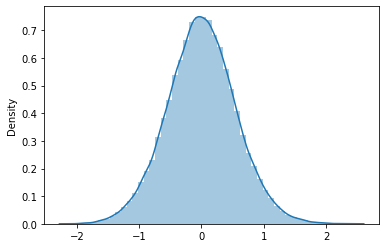

In [40]:
import seaborn as sns
y=p-prediction
sns.distplot(y,kde=True)
#sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

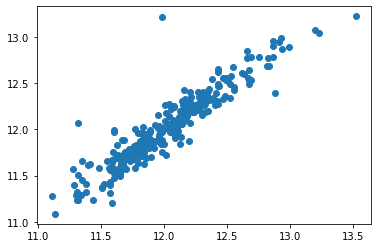

In [41]:
plt.scatter(p,prediction)

In [42]:
from sklearn import metrics

**Evaluating different Metrics to understand the model**

In [43]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction))
print('MSE:', metrics.mean_squared_error(Y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

MAE: 0.09820220210208139
MSE: 0.021416439607048934
RMSE: 0.1463435670162817


**Pickling**

In [44]:
import pickle

file = open('Advanced Housing.pkl', 'wb')

pickle.dump(gb_randomcv, file)